In [1]:
import numpy as np
import tensorflow as tf

train, test = tf.keras.datasets.fashion_mnist.load_data()

# wydobycie obrazów oraz labelek
images, labels = train

# normalizacja wartości pikseli (maks. wartość
# wynosi 255.0, czyli aby znormalizować nasze dane,
# musimy podzielić każdy piksel przez maks. wartość)
images = images/255.0

# zapisujemy dane jako int
labels = labels.astype(np.int32)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1,random_state=10,stratify=labels)

# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)



In [2]:
import tensorflow.keras.layers as layers
f_mnist_model = tf.keras.Sequential([
    # spłaszczanie obrazka do wektora jednowymiarowego
    layers.Flatten(),
    layers.Dense(1200, activation='relu'),
    layers.Dense(600, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(150, activation='relu'),

    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    layers.Dense(10, activation='softmax')
])


In [3]:
f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [4]:
train_stats = f_mnist_model.fit(train_ds, epochs=25, verbose=1)

Epoch 1/25
1688/1688 [==============================] - 47s 27ms/step - loss: 0.4999 - accuracy: 0.8193
Epoch 2/25
1688/1688 [==============================] - 42s 25ms/step - loss: 0.3844 - accuracy: 0.8615
Epoch 3/25
1688/1688 [==============================] - 39s 23ms/step - loss: 0.3423 - accuracy: 0.8742
Epoch 4/25
1688/1688 [==============================] - 39s 23ms/step - loss: 0.3171 - accuracy: 0.8841
Epoch 5/25
1688/1688 [==============================] - 47s 28ms/step - loss: 0.2974 - accuracy: 0.8906
Epoch 6/25
1688/1688 [==============================] - 48s 28ms/step - loss: 0.2818 - accuracy: 0.8954
Epoch 7/25
1688/1688 [==============================] - 48s 28ms/step - loss: 0.2706 - accuracy: 0.9009
Epoch 8/25
1688/1688 [==============================] - 47s 28ms/step - loss: 0.2572 - accuracy: 0.9049
Epoch 9/25
1688/1688 [==============================] - 47s 28ms/step - loss: 0.2464 - accuracy: 0.9089
Epoch 10/25
1688/1688 [==============================] - 44s 26m

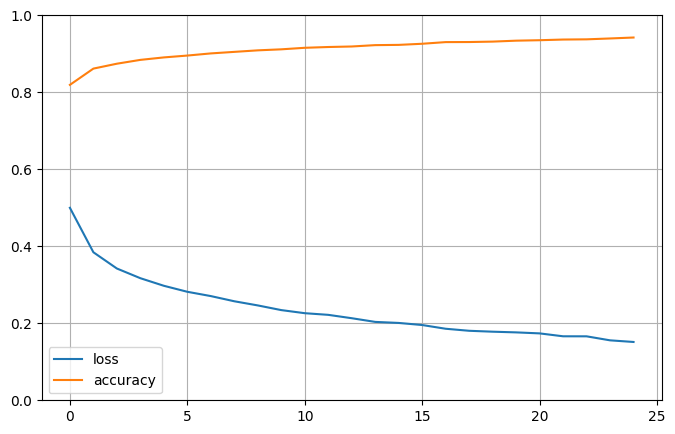

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [6]:
import albumentations as A
transform = A.Compose([
    A.RandomCrop(width=28, height=28),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])
transformed = transform(image=images)
transformed_image = transformed["image"]

In [7]:
f_mnist_model.save("f_mnist_model",save_format="tf")

INFO:tensorflow:Assets written to: f_mnist_model\assets


INFO:tensorflow:Assets written to: f_mnist_model\assets
